Import the relevant Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pyforest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

Read into our CSV file

In [23]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")
print(df.head()) 

   credit_score  income  loan_amount  loan_term  interest_rate  \
0           810  107410        11924         48           7.97   
1           418   37482        19291         24           6.94   
2           724   85641        39501         36           8.59   
3           444   73331        25714         36          13.09   
4           440   46723        35651         36           8.30   

   debt_to_income_ratio  employment_years  savings_balance  age  \
0                 43.29                32            27181   58   
1                 11.01                33            15089   43   
2                 37.11                 0            97459   33   
3                 33.39                18             2413   48   
4                 46.21                 6             9716   42   

   default_risk_score  
0         7634.543366  
1         6249.833059  
2         2148.117990  
3         4979.385344  
4         2993.851950  


In [24]:
print(test_df.head(10))

   credit_score  income  loan_amount  loan_term  interest_rate  \
0           340   31745         8983         48          10.12   
1           439  115081        42051         60           3.33   
2           619   35313         6619         36           9.06   
3           664   72269        19226         48           4.29   
4           564   46292        30476         48          11.15   
5           425  132360        11256         24          10.34   
6           304  120737        39947         24           8.62   
7           672   51598        25131         60           4.74   
8           436   67064        32624         12          11.15   
9           710   90342        29611         48           2.69   

   debt_to_income_ratio  employment_years  savings_balance  age  \
0                 18.33                11            91417   56   
1                 31.77                 6            17127   51   
2                 24.29                20            46761   42   
3    

Perform EDA

In [25]:
df.head(10)

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950
5,634,149410,7520,36,8.56,35.98,12,57089,66,8572.770742
6,422,86150,36910,12,11.73,46.69,30,60119,27,2758.649581
7,679,99671,7307,12,3.38,42.58,3,2739,34,8624.958225
8,526,141041,33270,48,12.56,17.24,8,10619,36,3463.519230
9,582,106652,22921,48,14.14,43.10,3,20661,47,5514.511014


In [26]:
df.isnull()
print(df.isnull().sum()) 

credit_score            0
income                  0
loan_amount             0
loan_term               0
interest_rate           0
debt_to_income_ratio    0
employment_years        0
savings_balance         0
age                     0
default_risk_score      0
dtype: int64


In [27]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [28]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [credit_score, income, loan_amount, loan_term, interest_rate, debt_to_income_ratio, employment_years, savings_balance, age, default_risk_score]
Index: []


In [29]:
df.describe()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,565.405000,85779.287500,27795.651250,36.315000,8.732238,29.812500,16.376250,48850.921250,42.443750,4529.968687
std,159.528109,37972.705711,12819.525021,17.163012,3.670453,11.626346,10.036339,29785.455545,15.011446,2567.048232
min,300.000000,20060.000000,5097.000000,12.000000,2.510000,10.000000,0.000000,28.000000,18.000000,49.757940
25%,426.750000,53056.250000,16136.000000,24.000000,5.537500,19.925000,8.000000,21359.750000,29.000000,2377.592064
50%,553.000000,85105.000000,28518.500000,36.000000,8.725000,29.645000,16.000000,47314.500000,42.000000,4379.666025
75%,702.000000,118776.000000,38539.750000,48.000000,11.915000,40.005000,25.000000,76191.000000,55.250000,6821.026905
max,849.000000,149972.000000,49976.000000,60.000000,14.990000,49.910000,34.000000,99976.000000,69.000000,9113.843128


In [30]:
df.columns

Index(['credit_score', 'income', 'loan_amount', 'loan_term', 'interest_rate',
       'debt_to_income_ratio', 'employment_years', 'savings_balance', 'age',
       'default_risk_score'],
      dtype='object')

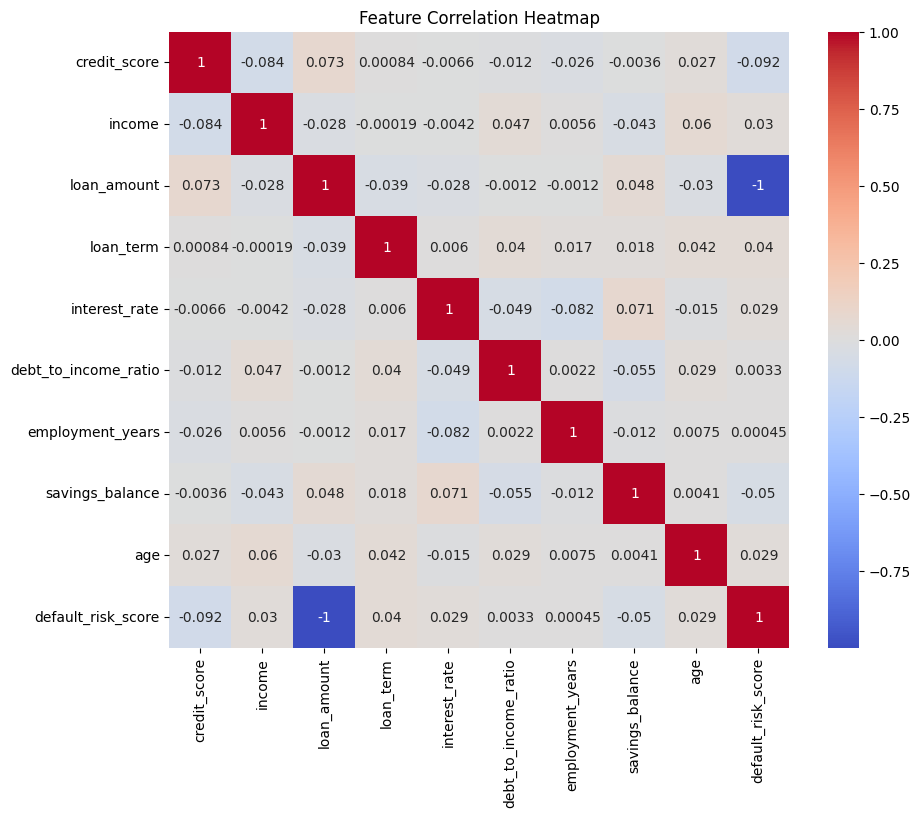

In [31]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()




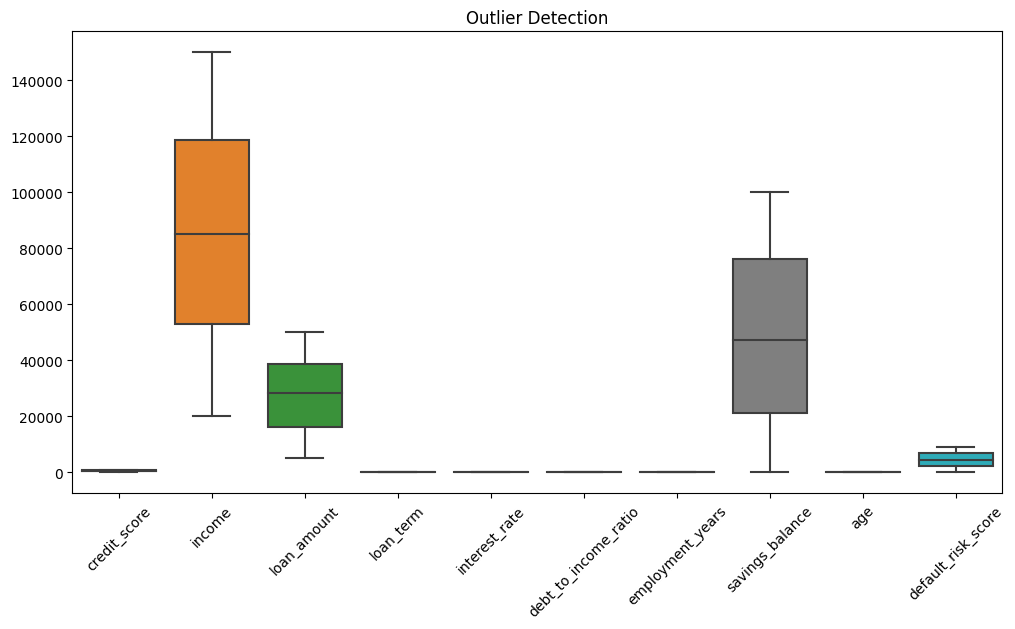

In [32]:
# Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.show()

In [33]:
# Step 3: Model Training
X = df.drop(columns=["default_risk_score"])
y = df["default_risk_score"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

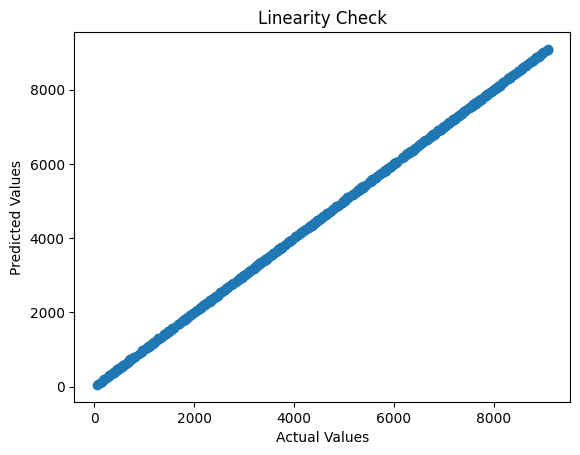

In [35]:
# Model Assumption Tests
# Linearity Check
plt.scatter(y_train, model.predict(X_train))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linearity Check")
plt.show()

In [36]:

# Multicollinearity Check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                Feature        VIF
0          credit_score  10.447391
1                income   5.534650
2           loan_amount   5.292960
3             loan_term   5.139920
4         interest_rate   5.883418
5  debt_to_income_ratio   6.729297
6      employment_years   3.449460
7       savings_balance   3.567017
8                   age   8.017349


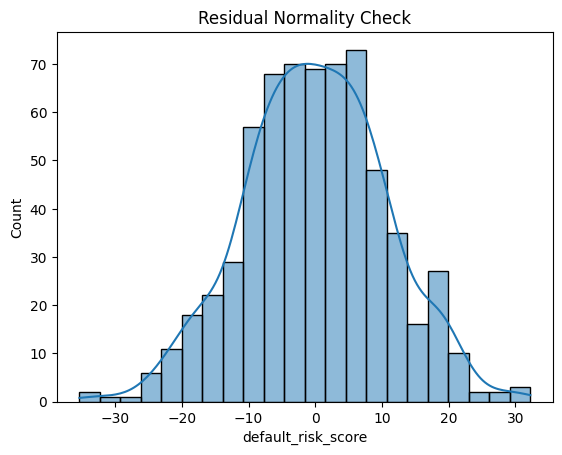

In [37]:
# Residual Normality Check
residuals = y_train - model.predict(X_train)
sns.histplot(residuals, kde=True)
plt.title("Residual Normality Check")
plt.show()

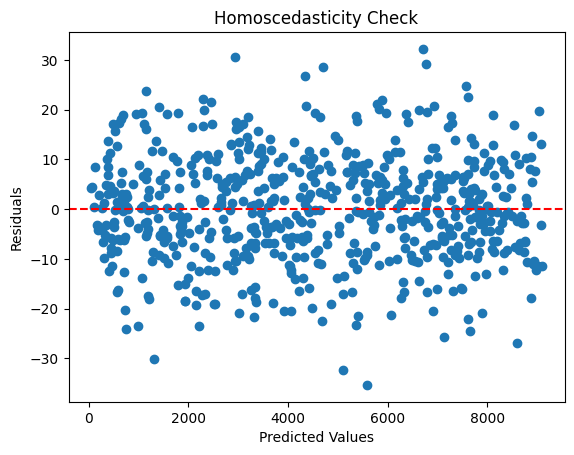

In [38]:
# Homoscedasticity Check
plt.scatter(model.predict(X_train), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [39]:
# Step 4: Model Evaluation
y_pred = model.predict(X_val)
print(f"R² Score: {r2_score(y_val, y_pred)}")
print(f"MAE: {mean_absolute_error(y_val, y_pred)}")
print(f"MSE: {mean_squared_error(y_val, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}")

R² Score: 0.9999836636868604
MAE: 8.049826699039869
MSE: 99.50785509075743
RMSE: 9.975362403980991


In [40]:
# Step 10: Hypothesis Testing (Feature Significance)
X_const = sm.add_constant(X_train)  # Add constant term
ols_model = sm.OLS(y_train, X_const).fit()
print(ols_model.summary())




                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.174e+06
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:32:19   Log-Likelihood:                -2419.1
No. Observations:                 640   AIC:                             4858.
Df Residuals:                     630   BIC:                             4903.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.026e+04 

In [41]:
# Identify insignificant features (p-value >= 0.05)
insignificant_features = ols_model.pvalues[ols_model.pvalues >= 0.05].index.tolist()
print("Insignificant Features (p-value >= 0.05):", insignificant_features)



Insignificant Features (p-value >= 0.05): ['income', 'loan_term']


In [ ]:
# ANOVA (If applicable, categorical variables should be tested)
categorical_features = []  # Add categorical features if any exist
for feature in categorical_features:
    anova_p_value = stats.f_oneway(*[df[df[feature] == cat]["default_risk_score"] for cat in df[feature].unique()]).pvalue
    print(f"ANOVA p-value for {feature}: {anova_p_value}")
    if anova_p_value >= 0.05:
        print(f"Feature {feature} does not significantly impact default_risk_score")